In [1]:
# Project 1
# Author: Kevin Xuan

In [2]:
# import packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# What are the 5 most popular trips that you would call "commuter trips"? 

In [4]:
%%bigquery commuter_trip

SELECT start_station_name, end_station_name, count(trip_id) as num_of_trips
FROM 
`bigquery-public-data`.san_francisco.bikeshare_trips
WHERE
(duration_sec > 5*60 and duration_sec < 2*60*60 and subscriber_type = 'Subscriber') and 
((extract(hour from start_date) >= 6 and extract(hour from end_date) <= 10) or
(extract(hour from start_date) >= 17 and extract(hour from end_date) <=20)) and
(extract(dayofweek from start_date)!= 1  and extract(dayofweek from start_date)!= 7)
GROUP BY start_station_name, end_station_name
ORDER BY count(trip_id) DESC
LIMIT 10;

Downloading: 100%|██████████| 10/10 [00:02<00:00,  3.44rows/s]


In [5]:
commuter_trip.head(10)

,start_station_name,end_station_name,num_of_trips
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5426
1,Steuart at Market,2nd at Townsend,4768
2,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),4573
3,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),4505
4,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,4059
5,San Francisco Caltrain (Townsend at 4th),Steuart at Market,3786
6,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3730
7,2nd at Townsend,Harry Bridges Plaza (Ferry Building),3629
8,Market at 10th,San Francisco Caltrain 2 (330 Townsend),3551
9,Steuart at Market,Embarcadero at Sansome,3458


In [6]:
'''
The 5 most popular trips that I would call "commuter trips" are from
1. Harry Bridges Plaza (Ferry Building) to 2nd at Townsend
2. Steuart at Market to 2nd at Townsend
3. San Francisco Caltrain (Townsend at 4th to Harry Bridges Plaza (Ferry Building)
4. San Francisco Caltrain (Townsend at 4th) to Temporary Transbay Terminal (Howard at Beale)
5. San Francisco Caltrain (Townsend at 4th) to Embarcadero at Folsom
'''

'\nThe 5 most popular trips that I would call "commuter trips" are from\n1. Harry Bridges Plaza (Ferry Building) to 2nd at Townsend\n2. Steuart at Market to 2nd at Townsend\n3. San Francisco Caltrain (Townsend at 4th to Harry Bridges Plaza (Ferry Building)\n4. San Francisco Caltrain (Townsend at 4th) to Temporary Transbay Terminal (Howard at Beale)\n5. San Francisco Caltrain (Townsend at 4th) to Embarcadero at Folsom\n'

In [7]:
# What are your recommendations for offers (justify based on your findings)?

In [8]:
# 1. Count of trips under duration

In [9]:
%%bigquery trips_duration

SELECT duration_group, count(trip_id) as trip_count
FROM
    (select trip_id,
    CASE
        WHEN duration_sec/60 > 5 and duration_sec/60 <15 then '5 - 15 min'
        WHEN duration_sec/60 >=15 and duration_sec/60 <30 then '15 - 30 min'
        WHEN duration_sec/60 >=30 and duration_sec/60 <45 then '30 - 45 min'
        WHEN duration_sec/60 >= 45 and duration_sec/60 <60 then '45 - 60 min'
        ELSE '> 1 hr'
    END as duration_group
    FROM
    `bigquery-public-data`.san_francisco.bikeshare_trips
    WHERE 
    (duration_sec > 5*60 and duration_sec < 2*60*60 and subscriber_type = 'Subscriber') and 
    ((extract(hour from start_date) >= 6 and extract(hour from end_date) <= 10) or
    (extract(hour from start_date) >= 17 and extract(hour from end_date) <=20)) and
    (extract(dayofweek from start_date)!= 1  and extract(dayofweek from start_date)!= 7))
GROUP BY duration_group
ORDER by trip_count DESC;

Downloading: 100%|██████████| 5/5 [00:02<00:00,  1.77rows/s]


In [10]:
trips_duration

,duration_group,trip_count
0,5 - 15 min,401243
1,15 - 30 min,41834
2,30 - 45 min,997
3,> 1 hr,389
4,45 - 60 min,267


<BarContainer object of 5 artists>

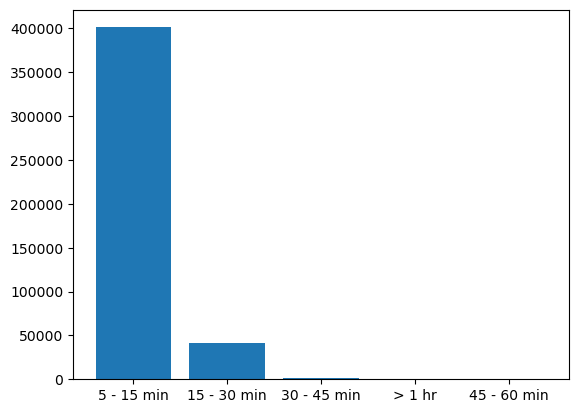

In [11]:
plt.bar(trips_duration.duration_group,trips_duration.trip_count)

In [12]:
'''
From the chart and the table, we can see that most commute trips are in the duration of 5-15 minutes. 
During these three years, we see that only approximately 1200 trips out of the 450,000 trips are
more than 30 minutes, and that 90% of the trips are in the range from 5 - 15 minutes, so the company 
should enforce the monthly and annually membership (30 minutes of ride). 
The "Bike Share for All" membership (45 minutes of ride) is not going to be useful for commuters, as most of their trips 
going to be are within 30 minutes. Hence, it's better to remove "Bike Share for All" offer. 
'''

'\nFrom the chart and the table, we can see that most commute trips are in the duration of 5-15 minutes. \nDuring these three years, we see that only approximately 1200 trips out of the 450,000 trips are\nmore than 30 minutes, and that 90% of the trips are in the range from 5 - 15 minutes, so the company \nshould enforce the monthly and annually membership (30 minutes of ride). \nThe "Bike Share for All" membership (45 minutes of ride) is not going to be useful for commuters, as most of their trips \ngoing to be are within 30 minutes. Hence, it\'s better to remove "Bike Share for All" offer. \n'

In [13]:
# 2. For commute rides, which days of week has the most number of rides?

In [14]:
%%bigquery day_of_week

SELECT dayofweek, count_of_trips 
  FROM (SELECT extract(dayofweek from start_date) as dayofweek, count(trip_id) as count_of_trips
  FROM `bigquery-public-data`.san_francisco.bikeshare_trips
  WHERE
  duration_sec > 5*60 and duration_sec < 2*60*60 and subscriber_type = 'Subscriber' and 
((extract(hour from start_date) >= 6 and extract(hour from end_date) <= 10) or
(extract(hour from start_date) >= 17 and extract(hour from end_date) <=20)) and
  extract(day from start_date) = extract(day from end_date) and
  extract(month from start_date) = extract(month from end_date) and
  extract(year from start_date) = extract(year from end_date)
  GROUP BY extract(dayofweek from start_date)) as d
  ORDER BY count_of_trips DESC;

Downloading: 100%|██████████| 7/7 [00:02<00:00,  2.34rows/s]


In [15]:
# transform dayofweek to Day
num_to_weekday = {1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'}
dayofweek_t = [num_to_weekday[i] for i in day_of_week.dayofweek]
day_of_week['dayofweek'] = pd.Series(dayofweek_t)

In [16]:
day_of_week

,dayofweek,count_of_trips
0,Tuesday,97084
1,Wednesday,94013
2,Monday,89517
3,Thursday,89468
4,Friday,74352
5,Saturday,9745
6,Sunday,7691


<BarContainer object of 7 artists>

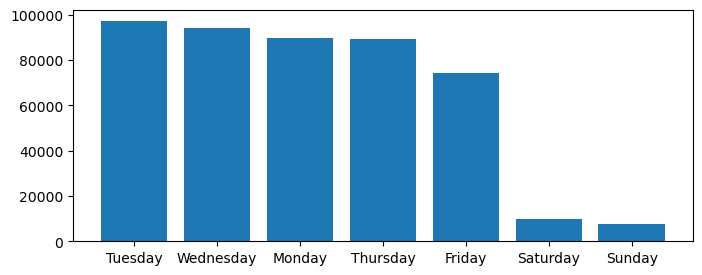

In [17]:
plt.figure(figsize=(8,3))
plt.bar(day_of_week.dayofweek,day_of_week.count_of_trips)

In [18]:
'''
From the table, we can see that out of all commute rides, Tuesday is the day of week which has 
the most number of rides. Number of rides on week days are greater than 155,900 per day, 
while number of rides for weekends are below 20,000 per day. From this, we can see that most
customers use bike as their transportation to commute to work.
'''

'\nFrom the table, we can see that out of all commute rides, Tuesday is the day of week which has \nthe most number of rides. Number of rides on week days are greater than 155,900 per day, \nwhile number of rides for weekends are below 20,000 per day. From this, we can see that most\ncustomers use bike as their transportation to commute to work.\n'

In [19]:
# 3. For one time customers, which days of week has the most number of rides and what's the
#    average number of minutes on each day?

In [20]:
%%bigquery customer_day_of_week

SELECT dayofweek, count_of_trips, round(duration_min,2) as ride_minutes
  FROM (SELECT extract(dayofweek from start_date) as dayofweek, count(trip_id) as count_of_trips,
        avg(duration_sec/60) as duration_min 
        FROM `bigquery-public-data`.san_francisco.bikeshare_trips
  WHERE
  duration_sec > 5*60 and duration_sec < 8*60*60 and subscriber_type = 'Customer' and
  extract(day from start_date) = extract(day from end_date) and
  extract(month from start_date) = extract(month from end_date) and
  extract(year from start_date) = extract(year from end_date)
  GROUP BY extract(dayofweek from start_date))
  ORDER BY count_of_trips DESC;

Downloading: 100%|██████████| 7/7 [00:02<00:00,  2.58rows/s]


In [21]:
customer_dayofweek_t = [num_to_weekday[i] for i in customer_day_of_week.dayofweek]
customer_day_of_week['dayofweek'] = pd.Series(customer_dayofweek_t)

In [22]:
customer_day_of_week

,dayofweek,count_of_trips,ride_minutes
0,Saturday,27741,50.61
1,Sunday,24704,52.32
2,Friday,18696,43.78
3,Thursday,15602,40.29
4,Monday,14281,43.15
5,Wednesday,14280,39.94
6,Tuesday,13841,39.95


In [23]:
'''
From the table above, we see that most one time customers use and rent bikes longer 
on weekends and those on weekdays, with an average of approximately 51 minutes on 
Saturday and 52 minutes on Sunday. We can see that trips about one time customers
are very different from those of subscribers, and therefore we should provide
different offers to customers and subscribers.
'''

'\nFrom the table above, we see that most one time customers use and rent bikes longer \non weekends and those on weekdays, with an average of approximately 51 minutes on \nSaturday and 52 minutes on Sunday. We can see that trips about one time customers\nare very different from those of subscribers, and therefore we should provide\ndifferent offers to customers and subscribers.\n'

In [24]:
''' RECOMMENDATION AND CONCLUSION
The dataset is valuable, as it records almost one million of bike trips over three years,
providing us patterns on how customers and subscribers use the bikes and eventually allowing
us to find the right offer which benefits both the customers and the company. However, we
see that the data lacks one really essential column: rider ID. Without this column, we are
not able to track an individual's daily pattern，and as a result we are not able to provide
personalized offer to these individual customer or subscriber. Hence, if we are given rider ID
for each row, we would have a better stance.

Back to data, as we can see from the data, most of the people who rent the bikes are commuters
who commute to work, and without any doubt our target customer group should be ones who live in
the city and live near to work. Then from the trip duration table above, we see that 90% of the
rides within 15 minutes, so presenting offers on longer ride time will not attract new customers
to use bikes. 

For the second table, we see that out of all commute trips from subscribers, trips 
which contain basic characteristics of a commute trip, most of the trips occur during weekdays,
especially in the middle of weekdays. With this, we can create a new bike plan just for commuters.
This plan charges lower monthly rate for customers, but different from the current monthly plan 
free bike rental can only be used during weekdays.

For the third table, we see that different from trips from subscibers, trips from one time customers
mostly concentrated on weekeends, showing that one time customers usually use this for leisure. 
Furthermore, we can see that these weekend trips last much longer than commute trips, with 
an average of 50 minutes of rides. Although the number of trips from one time customers consists
only 10% of all the trips, we should still create new offer for this group. Since most these weekend
bike rides are approximately 50 minutes, we can provide a one hour rental discount offer which customers
can purchase. With this offer, more one time customers are likely to rent the bike to have a short
tour ride around San Francisco and the Bay Area.

In conclusion, I suggest removing Bike Share for All, as most subscribers do not enjoy
the benefits from this program. In terms of new offer, for subscribers I recommend to come
up with a monthly weekday membership plan, attracting more commuters to use bikes to commute.
For one time customers, I suggest a one hour rental discount offer, which as a result
would attract customers to use bikes to tour rather than to walk.
'''

"Recommendation\nThe dataset is valuable, as it records almost one million of bike trips over three years,\nproviding us patterns on how customers and subscribers use the bikes and eventually allowing\nus to find the right offer which benefits both the customers and the company. However, we\nsee that the data lacks one really essential column: rider ID. Without this column, we are\nnot able to track an individual's daily pattern，and as a result we are not able to provide\npersonalized offer to these individual customer or subscriber. Hence, if we are given rider ID\nfor each row, we would have a better stance.\n\nBack to data, as we can see from the data, most of the people who rent the bikes are commuters\nwho commute to work, and without any doubt our target customer group should be ones who live in\nthe city and live near to work. Then from the trip duration table above, we see that 90% of the\nrides within 15 minutes, so presenting offers on longer ride time will not attract new cu